**Thinkful - 4.2.3 - Drill - Other methods – mean-shift, spectral, affinity**

From the drill below, I noticed:
1. All models had high prediction rates for the sample blob configuration.
2. When the blobs were spaced further apart, all models except for the affinity model had perfect or nearly perfect prediction rates, while the affinity model had 450 clusters and appeared to be unstable. The spectral model did have a few stray points.
3. In general, the accuracy of the models is as follows: k-means > mean-shift > spectral > affinity

In [10]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
from sklearn.metrics import accuracy_score
%matplotlib inline

**Blob #1** - Definition

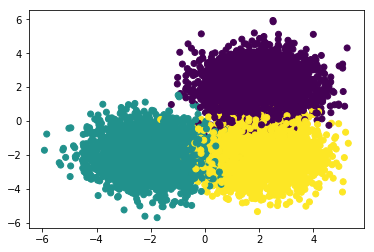

In [11]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(n_samples=10000,centers=centers,cluster_std=1,n_features=2,random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.9,random_state=42)

**Blob #1** - Comparison

K-MEANS


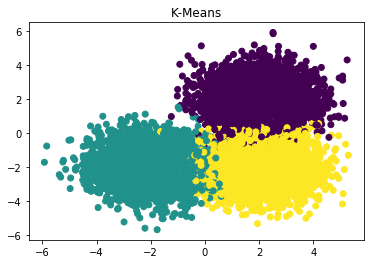

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0      352    0   10
1        1  310    9
2        6    5  307

MEAN SHIFT
Number of estimated clusters: 3


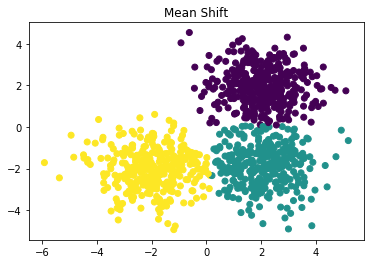

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8

SPECTRAL CLUSTERING


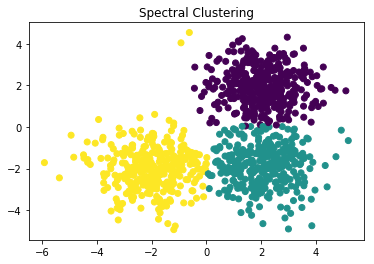

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      350   10    2
1        1    9  310
2        7  305    6

AFFINITY PROPOGATION
Done
Estimated number of clusters: 32


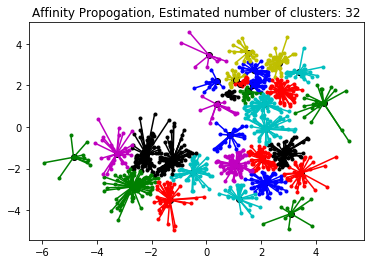

In [12]:
print("K-MEANS")
# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)
# Plot the solution.
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.title('K-Means')
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_train, y_pred))

#---------------------------

print("\nMEAN SHIFT")

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.title('Mean Shift')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

#---------------------------

print("\nSPECTRAL CLUSTERING")
# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.title('Spectral Clustering')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

#---------------------------

print("\nAFFINITY PROPOGATION")
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Affinity Propogation, Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

**Blob #2** - Definition (Spaced blobs further apart)

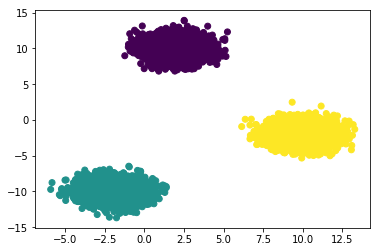

In [13]:
# The coordinates of the centers of our blobs.
centers = [[2, 10], [-2, -10], [10, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(n_samples=10000,centers=centers,cluster_std=1,n_features=2,random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.9,random_state=42)

**Blob #2** - Comparison

K-MEANS


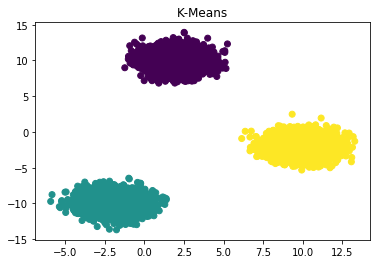

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0      362    0    0
1        0  320    0
2        0    0  318

MEAN SHIFT
Number of estimated clusters: 3


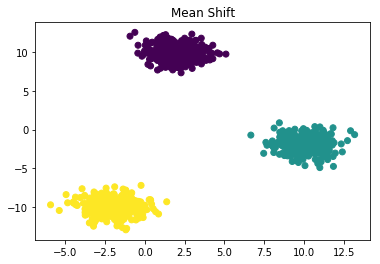

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      362    0    0
1        0    0  320
2        0  318    0

SPECTRAL CLUSTERING


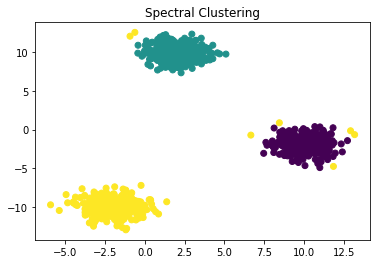

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  360    2
1        0    0  320
2      313    0    5

AFFINITY PROPOGATION
Done
Estimated number of clusters: 450


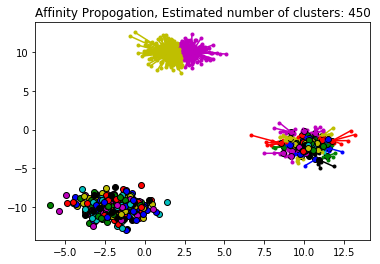

In [14]:
print("K-MEANS")
# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.title('K-Means')
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_train, y_pred))

#---------------------------

print("\nMEAN SHIFT")

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.title('Mean Shift')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

#---------------------------

print("\nSPECTRAL CLUSTERING")
# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.title('Spectral Clustering')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

#---------------------------

print("\nAFFINITY PROPOGATION")
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Affinity Propogation, Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

**Blob #3** - Definition (Decreased number of blobs from 3 to 2)

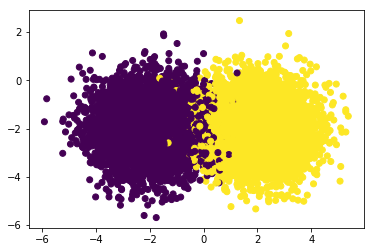

In [15]:
# The coordinates of the centers of our blobs.
centers = [[-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(n_samples=10000,centers=centers,cluster_std=1,n_features=2,random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.9,random_state=42)

**Blob #3** - Comparison

K-MEANS


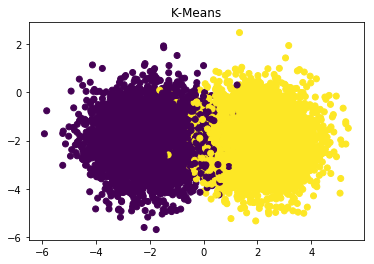

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0       11  501
1      475   13

MEAN SHIFT
Number of estimated clusters: 2


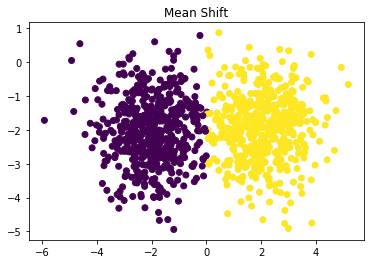

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      499   13
1       13  475

SPECTRAL CLUSTERING


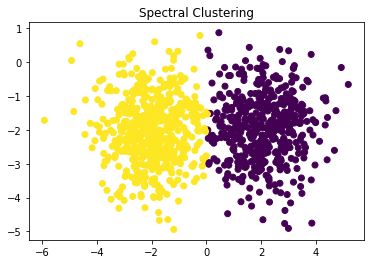

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0       12  500
1      475   13

AFFINITY PROPOGATION
Done
Estimated number of clusters: 29


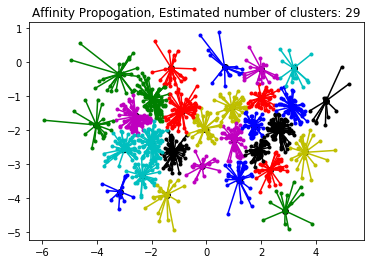

In [16]:
print("K-MEANS")
# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.title('K-Means')
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_train, y_pred))

#---------------------------

print("\nMEAN SHIFT")

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.title('Mean Shift')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

#---------------------------

print("\nSPECTRAL CLUSTERING")
# We know we're looking for three clusters.
n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.title('Spectral Clustering')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

#---------------------------

print("\nAFFINITY PROPOGATION")
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Affinity Propogation, Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

**Blob #4** - Definition (Increased number of blobs from 3 to 5)

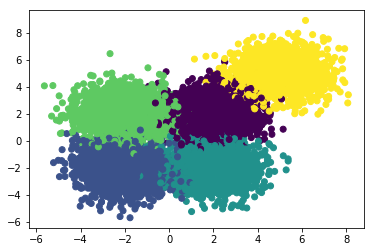

In [17]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2],[-2,2],[5,5]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(n_samples=10000,centers=centers,cluster_std=1,n_features=2,random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.9,random_state=42)

**Blob #4** - Comparison

K-MEANS


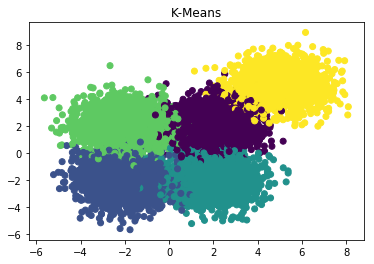

Comparing k-means clusters against the data:
col_0    0    1    2    3    4
row_0                         
0        6  211    2    0    2
1        4    0    0  195    4
2        0    3    0    7  181
3      177    6    0    4    0
4        0    1  197    0    0

MEAN SHIFT
Number of estimated clusters: 5


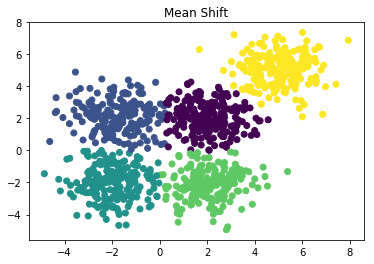

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0      207   10    0    2    2
1        0    5  193    5    0
2        2    1    7  181    0
3        6  177    4    0    0
4        1    0    0    0  197

SPECTRAL CLUSTERING


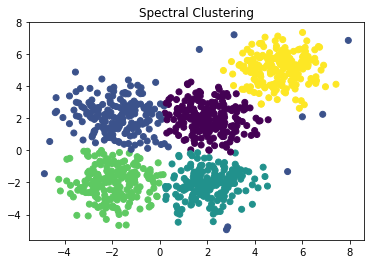

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0      208   10    1    0    2
1        0    6    4  193    0
2        2    4  177    8    0
3        6  177    0    4    0
4        1    5    0    0  192

AFFINITY PROPOGATION
Done
Estimated number of clusters: 28


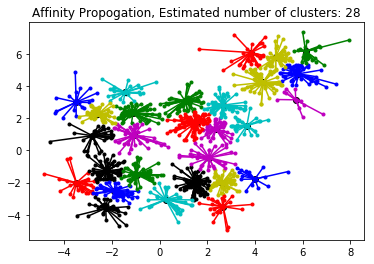

In [18]:
print("K-MEANS")
# Calculate predicted values.
y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.title('K-Means')
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_train, y_pred))

#---------------------------

print("\nMEAN SHIFT")

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.title('Mean Shift')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

#---------------------------

print("\nSPECTRAL CLUSTERING")
# We know we're looking for three clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.title('Spectral Clustering')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

#---------------------------

print("\nAFFINITY PROPOGATION")
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Affinity Propogation, Estimated number of clusters: {}'.format(n_clusters_))
plt.show()